<a href="https://colab.research.google.com/github/Talibsid-1996/Airbnb_EDA_Project/blob/main/Airbnb_Bookings_Analysis(Mohd_Talib)_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

##Import all libraries.

In [ ]:
import numpy as np
import pandas as pd

from datetime import datetime
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Airbnb NYC 2019.csv')

#Import the data.

In [ ]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
df.describe()

In [ ]:
df.info()

In [ ]:
df.isna().sum()

**Q1 -** **What are the number of reviews with respect to room** **type**? 





In [ ]:
review_room_type = df[['room_type','number_of_reviews']].groupby('room_type')['number_of_reviews'].sum()
review_room_type

room_type
Entire home/apt    580403
Private room       538346
Shared room         19256
Name: number_of_reviews, dtype: int64

Text(0, 0.5, 'Total No. of reviews')

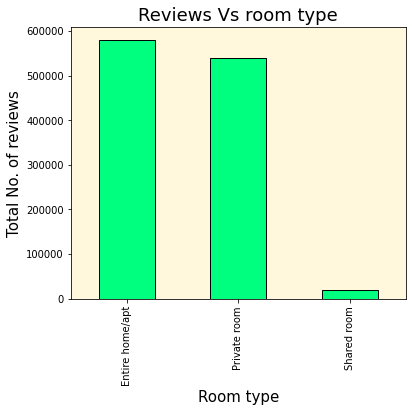

In [ ]:
plt.rcParams['figure.figsize'] = (6,5)
plt.rcParams['axes.facecolor'] = 'cornsilk'

review_room_type.plot(kind = 'bar',color = 'springgreen' ,ec = 'black')
plt.title('Reviews Vs room type' ,fontsize = 18)
plt.xlabel('Room type' , fontsize = 15)
plt.ylabel('Total No. of reviews' , fontsize = 15)

#Inference:-

People like Entire home/apt the most according to reviews.

**Q2 - Maximun number of nights stayed in which room type?**


In [ ]:
nights_room_type = df[['room_type','minimum_nights']].groupby('room_type')['minimum_nights'].sum()
nights_room_type

room_type
Entire home/apt    216152
Private room       120067
Shared room          7511
Name: minimum_nights, dtype: int64

Text(0, 0.5, 'No. of nights stayed')

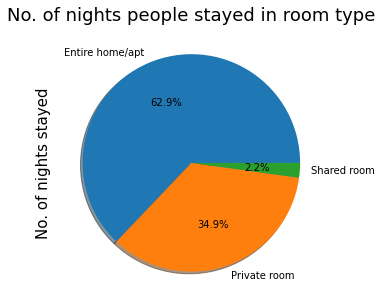

In [ ]:
plt.rcParams['figure.figsize'] = (6,5)

nights_room_type.plot.pie(shadow = True,autopct='%0.1f%%')
plt.title('No. of nights people stayed in room type' ,fontsize = 18)
# plt.xlabel('Room type' , fontsize = 15)
plt.ylabel('No. of nights stayed' , fontsize = 15)

#Inference:-

People dont prefer shared room.Maximum number of nights people stayed in Entire home/apt.

**Q3 - How many host listings in different neighbourhood groups?**

In [ ]:
host_listings_df = df[['neighbourhood_group','calculated_host_listings_count']].groupby('neighbourhood_group')['calculated_host_listings_count'].sum()
host_listings_df

neighbourhood_group
Bronx              2437
Brooklyn          45925
Manhattan        277073
Queens            23005
Staten Island       865
Name: calculated_host_listings_count, dtype: int64

Text(0, 0.5, 'Neighbourhood groups')

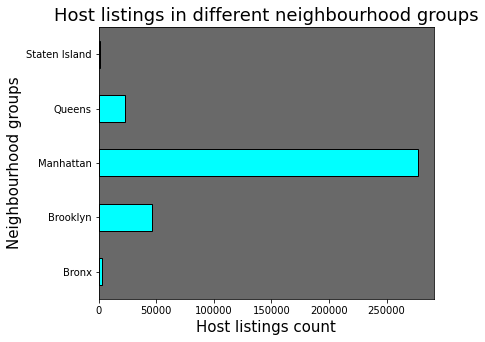

In [ ]:
plt.rcParams['figure.figsize'] = (6,5)
plt.rcParams['axes.facecolor'] = 'dimgrey'

host_listings_df.plot.barh('calculated_host_listings_count','neighbourhood_group',color = 'cyan',ec = 'black')
plt.title('Host listings in different neighbourhood groups' ,fontsize = 18 )
plt.xlabel('Host listings count' , fontsize = 15)
plt.ylabel('Neighbourhood groups' , fontsize = 15 )

#Inference:-

Manhattan has the maximum number of host listing counts following Brooklyn and Queens.

In [ ]:
df.head(15)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


**Q4 - What are the prices of room type with respect to different neighbourhood?**

In [ ]:
prices_room_type = df[['neighbourhood_group','room_type','price']].groupby(['neighbourhood_group','room_type'])['price'].sum().unstack()
prices_room_type

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,48325,43546,3588
Brooklyn,1704633,775099,20868
Manhattan,3289707,932111,42709
Queens,308218,241983,13666
Staten Island,30597,11711,517


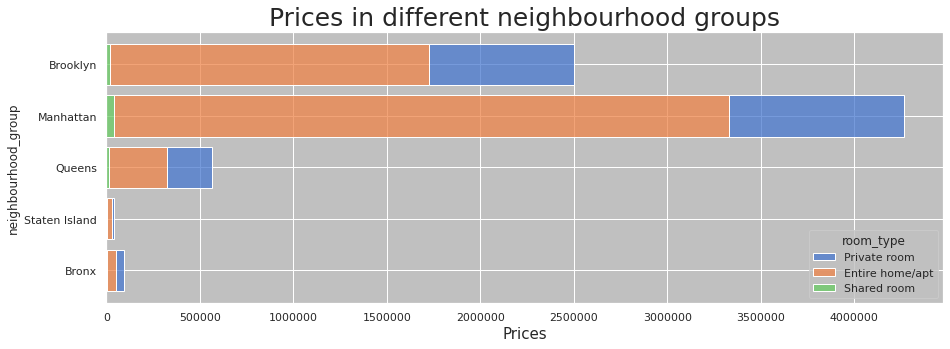

In [ ]:
plt.rcParams['figure.figsize'] = (15,5) 

plt.rcParams['axes.facecolor'] = 'silver'
plt.ticklabel_format(style='plain')
sns.histplot( y=df['neighbourhood_group'], hue=df['room_type'],weights=df['price'],
             multiple='stack', palette='muted', shrink=0.8)
plt.title('Prices in different neighbourhood groups' ,fontsize = 25 )

plt.xlabel('Prices' , fontsize = 15 )
plt.show()

**Ans**- The price of Entire home/apt in Manhattan is maximum.The minimum price is of Shared room.

**Q5- How many room types available at one neighbourhood_group?**

In [ ]:

famous_room_type = df[['neighbourhood_group','room_type']].groupby(['neighbourhood_group','room_type'])['room_type'].count().unstack()
famous_room_type

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,379,652,60
Brooklyn,9559,10132,413
Manhattan,13199,7982,480
Queens,2096,3372,198
Staten Island,176,188,9


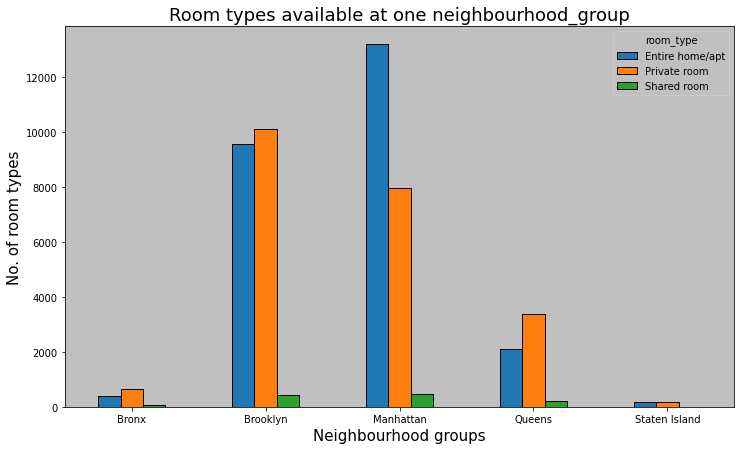

In [ ]:
from matplotlib import figure
plt.rcParams['figure.figsize'] = (12,7) 
plt.rcParams['axes.facecolor'] = 'silver'

famous_room_type.plot.bar(ec = 'black')

plt.title('Room types available at one neighbourhood_group' ,fontsize = 18 )
plt.xlabel('Neighbourhood groups' , fontsize = 15 )
plt.ylabel('No. of room types' , fontsize = 15 )
plt.xticks(rotation = 'horizontal')


plt.show()


#Inference:-

Manhattan have maximum number of Entire home/apt but Brooklyn have more private room availability than Manhattan. 
Shared rooms are not available in Staten island.

**Q6 - In which room type people are preferring to stay longer and where it is located?**

In [ ]:
people_prefer_rooms = df[['neighbourhood_group','room_type','minimum_nights']].groupby(['neighbourhood_group','room_type'])['minimum_nights'].sum().unstack()
people_prefer_rooms

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,2258,2516,202
Brooklyn,62433,56126,3202
Manhattan,139108,43477,3248
Queens,11255,17265,838
Staten Island,1098,683,21


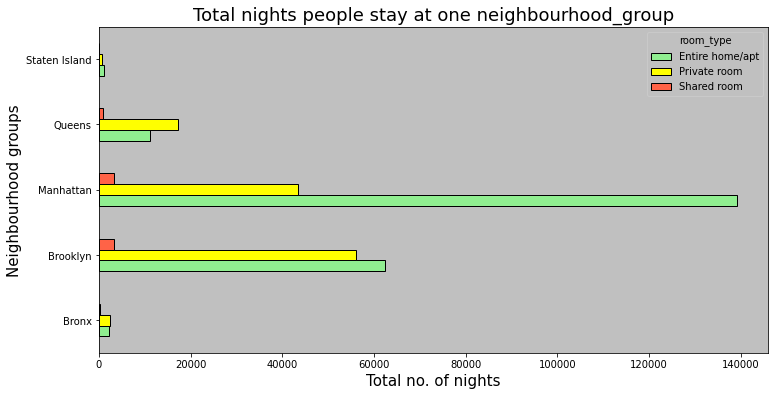

In [ ]:
from matplotlib import figure
plt.rcParams['figure.figsize'] = (12,6) 
plt.rcParams['axes.facecolor'] = 'silver'

people_prefer_rooms.plot.barh(color = ('lightgreen','yellow','tomato'),ec = 'black')

plt.title('Total nights people stay at one neighbourhood_group' ,fontsize = 18 )
plt.xlabel('Total no. of nights' , fontsize = 15 )
plt.ylabel('Neighbourhood groups' , fontsize = 15 )
plt.xticks(rotation = 'horizontal')


plt.show()


#Inference:-

People prefer **Entire home/apt** in **Manhattan** and **private room** in **Brooklyn.**

In [ ]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


**Q6 - How many hosts available in different neighbourhood group?**



In [ ]:
host_avail = df[['neighbourhood_group','host_name']].groupby('neighbourhood_group')['host_name'].count()
host_avail

neighbourhood_group
Bronx             1090
Brooklyn         20095
Manhattan        21652
Queens            5664
Staten Island      373
Name: host_name, dtype: int64

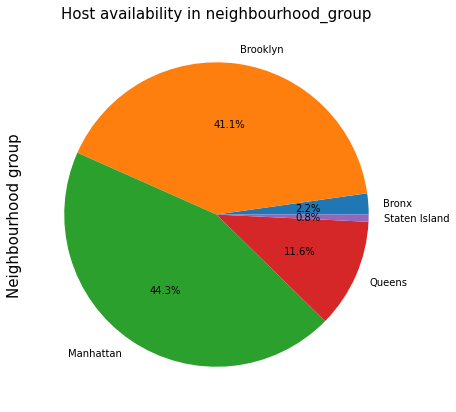

In [ ]:
from matplotlib import figure
plt.rcParams['figure.figsize'] = (12,7) 

host_avail.plot(kind = 'pie',autopct='%0.1f%%')

plt.title('Host availability in neighbourhood_group' ,fontsize = 15 )

plt.ylabel('Neighbourhood group' , fontsize = 15 )

plt.show()


#Inference

Most number of host available in **Manhattan** (21652) followed 
**Brooklyn** (20095)and **Queens** (5664).**Air** **bnb** should focus on **Bronx** and Staten island beacause it has less than **3%** of host availability.



In [ ]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


**Q7 -Top 10 hosts who have higher prices.**

In [ ]:
top_host = df[['host_name','price']].groupby('host_name')['price'].sum().reset_index().sort_values('price', ascending = False).head(10).set_index('host_name')
top_host

,price
host_name,
Sonder (NYC),82795
Blueground,70331
Michael,66895
David,65844
Alex,52563
Jessica,50697
John,41892
Sally,39789
Kara,36723


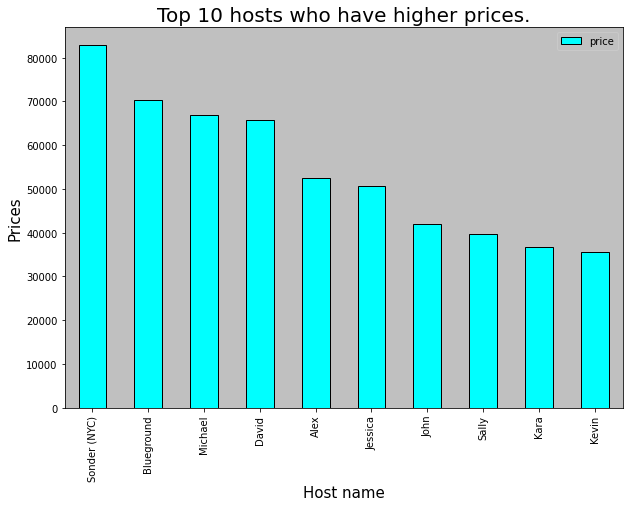

In [ ]:
from matplotlib import figure
plt.rcParams['figure.figsize'] = (10,7) 
plt.rcParams['axes.facecolor'] = 'silver'
top_host.plot.bar(ec = 'black',color = "cyan")


plt.title('Top 10 hosts who have higher prices.' ,fontsize = 20 )
plt.ylabel('Prices' , fontsize = 15)
plt.xlabel('Host name' , fontsize = 15 )

plt.show()


#Inference

Sonder(NYC) has the higher prices followed by Blueground and Micheal.

**Q7 - Which type of room people prefer in diffrent localities?**

In [ ]:
people_prefer_neighbourhood = df[['neighbourhood_group','room_type','minimum_nights']].groupby(['room_type','neighbourhood_group'])['minimum_nights'].sum().unstack()
people_prefer_neighbourhood

neighbourhood_group,Bronx,Brooklyn,Manhattan,Queens,Staten Island
room_type,,,,,
Entire home/apt,2258,62433,139108,11255,1098
Private room,2516,56126,43477,17265,683
Shared room,202,3202,3248,838,21


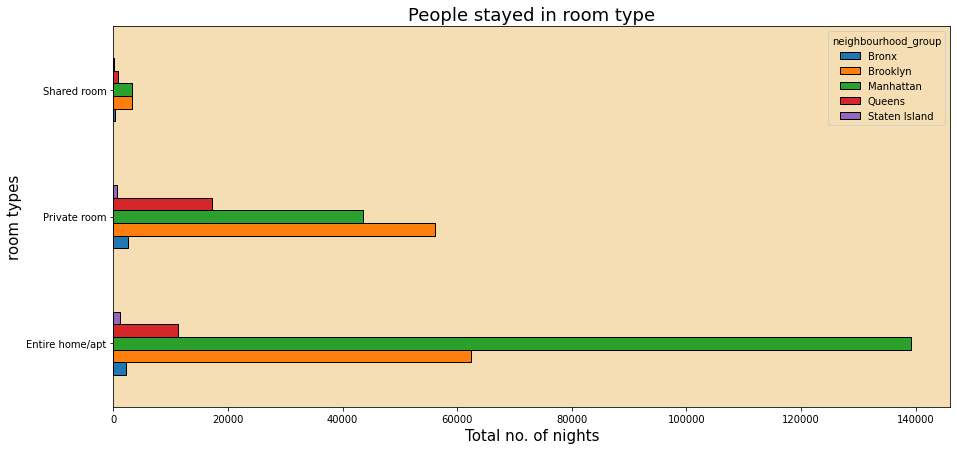

In [ ]:
from matplotlib import figure
plt.rcParams['figure.figsize'] = (15,7) 
plt.rcParams['axes.facecolor'] = 'wheat'

people_prefer_neighbourhood.plot.barh(ec = 'black')

plt.title('People stayed in room type' ,fontsize = 18 )
plt.xlabel('Total no. of nights' , fontsize = 15 )
plt.ylabel('room types' , fontsize = 15 )
plt.xticks(rotation = 'horizontal')


plt.show()


#Inference
*   1. People like shared rooms in Brooklyn and Manhattan.
*   2. Most people like private rooms in Brooklyn.
    3. Most people like Entire home/apt in Manhattan.



  





**Q8 - Correlation between all the columns.**

In [ ]:
df.corr()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
id,1.000000,0.588290,-0.003125,0.090908,0.010619,-0.013224,-0.319760,0.291828,0.133272,0.085468
host_id,0.588290,1.000000,0.020224,0.127055,0.015309,-0.017364,-0.140106,0.296417,0.154950,0.203492
latitude,-0.003125,0.020224,1.000000,0.084788,0.033939,0.024869,-0.015389,-0.010142,0.019517,-0.010983
longitude,0.090908,0.127055,0.084788,1.000000,-0.150019,-0.062747,0.059094,0.145948,-0.114713,0.082731
price,0.010619,0.015309,0.033939,-0.150019,1.000000,0.042799,-0.047954,-0.030608,0.057472,0.081829
minimum_nights,-0.013224,-0.017364,0.024869,-0.062747,0.042799,1.000000,-0.080116,-0.121702,0.127960,0.144303
number_of_reviews,-0.319760,-0.140106,-0.015389,0.059094,-0.047954,-0.080116,1.000000,0.549868,-0.072376,0.172028
reviews_per_month,0.291828,0.296417,-0.010142,0.145948,-0.030608,-0.121702,0.549868,1.000000,-0.009421,0.185791
calculated_host_listings_count,0.133272,0.154950,0.019517,-0.114713,0.057472,0.127960,-0.072376,-0.009421,1.000000,0.225701
availability_365,0.085468,0.203492,-0.010983,0.082731,0.081829,0.144303,0.172028,0.185791,0.225701,1.000000


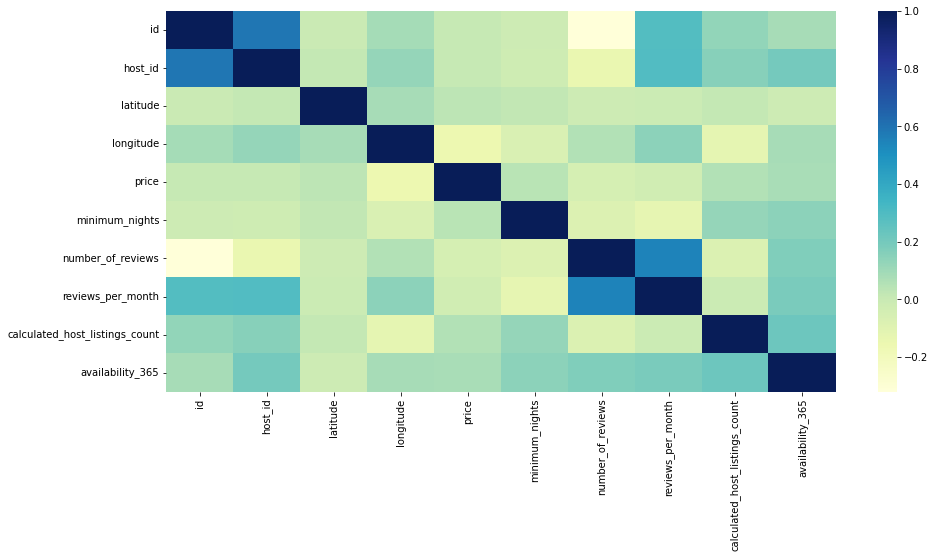

In [ ]:
plt.rcParams['figure.figsize'] = (15,7) 
sn.heatmap(df.corr() ,cmap = 'YlGnBu')


**Q9 - Find the host name who earns the most.**




In [ ]:
# create a copy of dataframe
df_new = df.copy()
df_new.head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355


In [ ]:
# add a column to find the earnings

df_new['earnings'] = df_new['price'] * df_new['minimum_nights']
df_new

In [ ]:
top_earners = df_new[['host_name','earnings']].groupby('host_name')['earnings'].sum().reset_index().sort_values('earnings', ascending = False).head(10)
top_earners

,host_name,earnings
1356,Blueground,2258580
4791,Jenny,1215111
5336,Kara,1172637
550,Amy,1153867
5423,Kathrine,1002082
9781,Sonder (NYC),950453
4419,Iveta,857750
7892,Noelle,732930
8395,Pranjal,664320
7135,Michael,610539


<function matplotlib.pyplot.show(*args, **kw)>

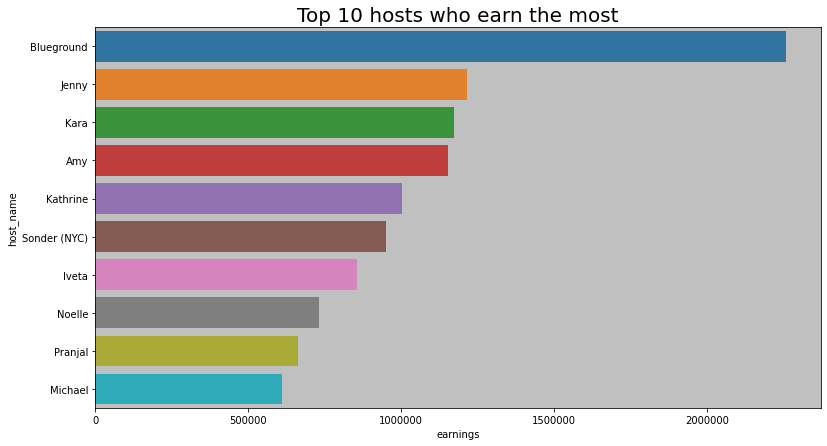

In [ ]:
from matplotlib import figure
plt.figure(figsize = (13,7))
plt.rcParams['axes.facecolor'] = 'silver'

plt.ticklabel_format(style='plain')
plt.title('Top 10 hosts who earn the most' ,fontsize = 20 )
sns.barplot(y=top_earners['host_name'], x = top_earners['earnings'])
plt.show

#Inference

Blueground has the highest earning.As we saw earlier Sonder(NYC) has higher prices but it does not have that much earning.
Jenny and Kara earn good beacuse they dont have higher prices.

**Q10 -Top earners in neighbourhood group with respect to room type.**

In [ ]:
df_new.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,earnings
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,149
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,225
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365,450


In [ ]:
df_new[['neighbourhood_group','room_type','earnings']].groupby(['neighbourhood_group','room_type'])['earnings'].sum().unstack()

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,226349,143670,8385
Brooklyn,11145804,4952427,124176
Manhattan,34103936,6548968,288125
Queens,2344854,2675540,41156
Staten Island,160695,37068,1187


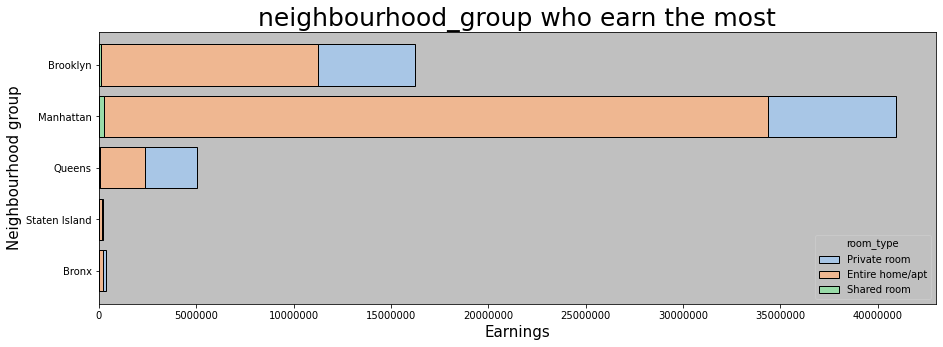

In [ ]:
plt.rcParams['figure.figsize'] = (15,5) 
plt.rcParams['axes.facecolor'] = 'silver'
plt.ticklabel_format(style='plain')
sns.histplot( y=df_new['neighbourhood_group'], hue=df_new['room_type'],weights=df_new['earnings'],
             multiple='stack', palette='pastel', shrink=0.8)
plt.title('neighbourhood_group who earn the most' ,fontsize = 25 )
plt.ylabel('Neighbourhood group' , fontsize = 15)
plt.xlabel('Earnings' , fontsize = 15 )
plt.show()

#Inference

Manhattan has highest earning beacause it has maximum number of room availablity.In each neighbourhood Entire home/apt has the highest the earning beacause it has the maximum prices also.

#Summary:-


This Airbnb ('AB_NYC') dataset for the 2019 year appeared to be a very rich dataset with a variety of columns that allowed us to do deep data exploration on each column presented.After importing the data ,i found that it has only single csv file.Our data had 46000 rows and 16 columns ,it was not a big data but still we succeeded in getting some amazing insights.Like,we know that Manhattan is a good place to stay because living in Manhattan allows tourist to live freely, which can save them tons of mone. Getting anywhere within the city is only a train ride away, and public transport has plenty of options for getting out of the city as well.That's why Mahattan has maximum number of hosts and maximum number of room availability.Apart from Manhattan, there are many places to go to in New York.
So,Airbnb should focus on other areas like Bronx and Staten Island.   Airbnb should increase the number of room availabilty and number of hosts in other areas.

#Summarizing our findings, suggesting other features
#Conclusion:-

The present given and explored dataset of Airbnb 2019, helps us to analyse different types of columns associated with their work.

1-Firstly, we found that the most number of listing in Airbnb properties are directly dependent on the requirement/purpose of the guest, either they booking for tourism, work, etc.

2-Secondly, we found that neighbourhood areas, room type, minimum number of nights, price, availability 365, listing of hosts are some of the most important columns used in our analysis, as it helped us to identify the direct relationship and trend of booking.

3-Among all the locality Manhattan is the most expensive for booking and it has also the maximum number of listings of 327 by the host.

4-Variation in price range is another major factor for booking rate within the neighbourhood.

5-Blueground has the highest earning.As we saw earlier Sonder(NYC) has higher prices but it does not have that much earning. Jenny and Kara earn good beacuse they dont have higher prices.

6- Manhattan has highest earning beacause it has maximum number of room availablity.In each neighbourhood Entire home/apt has the highest the earning beacause it has the maximum prices also.

7-Most number of host available in Manhattan (21652) followed 
Brooklyn (20095)and Queens(5664).Airbnb should focus on Bronx and Staten island beacause it has less than 3% of host availability.

Lastly, we found some data columns like last review and reviews per month had lot of missing value which more or less restricted us to include in our current analysis. Further suggestion, there was need for guest listing review ratings (0-5 or good-satisfactory-bad) column, as this would really helpful in predicting deeper on overall experience of guest listings. Overall, we able to discover a good number of interesting relationships among different variables and features in each step of process. In short, guest listing and hosts service are the two important components for the successful run of business which Airbnb ('AB_NYC_2019') does.


